In [1]:
# Import relevant libraries 

import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pysal as ps
import libpysal
import pyproj
import geopy
import cartopy as cp
import geojson
import osmnx as ox
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import bokeh
import folium

# Quest 2: Exploring and manipulating geospatial data with geopandas 

We will cover:
   1. I/O operations 
   2. Getting data from OpenStreetMap (with _OSMnx_)
   3. Reprojecting geospatial data
   4. Basic geoprocessing tools from geopandas (Clip, Spatial join)
    
Note:
- All data is taken from the Geoda Center: https://geodacenter.github.io/. Refer to the main quest page on the StackUp platform for more details.
- Parts of the code marked with the _[quiz]_ tag provide output necessary to answer quiz questions


### 1. Reading/Writing spatial data from/to file
Source: https://geopandas.org/en/stable/docs/user_guide/io.html


__Reading__: geopandas can read almost any vector-based spatial data format (including ESRI shapefile, GeoJSON files and more) and return a GeoDataFrame (gdf) object using the command `geopandas.read_file()`


__Writing__: GeoDataFrames can be exported to many different standard formats using `geopandas.GeoDataFrame.to_file()`

#### Read dataset containing health and socioeconomics statistics in Chicago (ComArea_ACS14_f.shp) from your working directory:
`your_var_name = gpd.read_file("your filepath")`

In [2]:
lang=gpd.read_file("chicago_data/comarea/ComArea_ACS14_f.shp")

#### Inspect your gdf:
`your_var_name.head()`


Scroll through the columns in your gdf. The last column contains the geometry attribute.

In [3]:
lang.head()

,ComAreaID,community,TRACTCnt,shape_area,shape_len,Pop2012,Pop2014,PopChng,PopM,PopMP,...,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,geometry
0,35,DOUGLAS,10,4.600462e+07,31027.054510,18238,19430,3.1645,8294,42.6866,...,13.4,74.5,85.5,62.1,482.2,0,1063.3,727.4,4.2,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,36,OAKLAND,3,1.691396e+07,19565.506153,5918,6473,4.4791,2499,38.6065,...,8.2,54.5,54.2,43.7,435.4,0,1655.4,1629.3,6.7,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,37,FULLER PARK,2,1.991670e+07,25339.089750,2876,2543,-6.1450,1218,47.8962,...,22.6,89.6,70.5,82.4,489.9,2,1061.9,1556.4,0.0,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,38,GRAND BOULEVARD,14,4.849250e+07,28196.837157,21929,22531,1.3540,9681,42.9675,...,12.1,63.8,39.0,46.7,590.4,1,1454.6,1680.0,13.2,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,39,KENWOOD,7,2.907174e+07,23325.167906,17841,18217,1.0428,8543,46.8958,...,8.9,49.1,46.2,31.5,397.9,0,610.2,549.1,0.0,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


#### Inspect the 'geometry' attribute column:
`your_var_name['geometry'].head()`


*[quiz]* Take note of the data type (dtype).

In [25]:
lang['geometry'].head()

0    POLYGON ((-87.60914 41.84469, -87.60915 41.844...
1    POLYGON ((-87.59215 41.81693, -87.59231 41.816...
2    POLYGON ((-87.62880 41.80189, -87.62879 41.801...
3    POLYGON ((-87.60671 41.81681, -87.60670 41.816...
4    POLYGON ((-87.59215 41.81693, -87.59215 41.816...
Name: geometry, dtype: geometry

#### Display the geometry of the fourth feature (i.e. index = 3) in the gdf:
`your_var_name['geometry'][3]`


*[quiz]* What shape best describes the shape of this feature?

In [41]:
print(lang.geometry[3])

POLYGON ((-87.60670812560372 41.816813771373916, -87.60670480953513 41.81657908583583, -87.60670022648416 41.8163387135525, -87.60669581538596 41.81609935772734, -87.60668982110386 41.815811802465646, -87.60668357216166 41.8155663152661, -87.60667660553902 41.81529991216345, -87.6066796364494 41.81499416811356, -87.6066823589318 41.81471953500857, -87.60667153481018 41.814281645324144, -87.60666414094077 41.813994602529604, -87.60665643548607 41.81366052091473, -87.60665089439038 41.81342058153232, -87.60664694986741 41.81317320016693, -87.60664346744456 41.812954776539605, -87.60663536449945 41.81265587393209, -87.60662867423541 41.81240396220565, -87.60662516618764 41.8122405459756, -87.60662310148156 41.812134384416815, -87.60661918378726 41.81193578400059, -87.60661336840799 41.81173632084688, -87.60660910203794 41.811578306019406, -87.60660495088327 41.811354023192386, -87.606598238989 41.81099140177078, -87.60659114670048 41.81069722560556, -87.60658567762151 41.81048011891593, -

#### Display the other attributes of the same feature (i.e. index = 3):
`your_var_name.iloc[3]`


Take note of the _community_ name of this feature. You will need this for the next step.

In [27]:
lang.iloc[3]

ComAreaID                                                    38
community                                       GRAND BOULEVARD
TRACTCnt                                                     14
shape_area                                        48492503.1554
shape_len                                          28196.837157
                                    ...                        
ChlLeadP                                                      1
GonorrF                                                  1454.6
GonorrM                                                  1680.0
Tuberc                                                     13.2
geometry      POLYGON ((-87.60670812560372 41.81681377137391...
Name: 3, Length: 87, dtype: object

### 2. Fetching data from OpenStreetMap
For more details, refer to: https://osmnx.readthedocs.io/en/stable/internals.html#osmnx-geocoder-module

We can use the osmnx package to read data from OpenStreetMap to GeoDataFrames. Now, we will fetch the city boundary of Chicago using `osmnx.geocode_to_gdf(query)`

You can save your query (i.e. name of the country/city/region that you are interested in) as a separate variable. For example, if we want to fetch the city boundary of Chicago:

In [7]:
city_name = 'Chicago, Illinois'
city = ox.geocoder.geocode_to_gdf(city_name, which_result=1)

#### Now, do the same to fetch the boundary of the community you identified above:

In [8]:
community_name = 'GRAND BOULEVARD, Chicago'
community = ox.geocoder.geocode_to_gdf(community_name, which_result=3)

#### Inspect your new community variable:

# ⓘ 
> This community area is part of the larger _Bronzeville_ area, an important center for African-American culture and businesses in Chicago. Bronzeville is also one of 10 priority communities selected as a part of the initial phase of a community development initiative by its Mayor.

In [9]:
community

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"LINESTRING (-87.45073 41.65135, -87.45029 41.6...",41.651352,41.650716,-87.449927,-87.450734,268774591,way,848582932,41.651002,-87.450294,"Grand Boulevard, East Chicago, Lake County, In...",highway,residential,0.40001


#### and display its geometry:

The shape you see should be more or less the same as the one you saw earlier (from the gdf)!

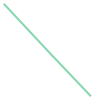

In [32]:
community['geometry'][0]

#### Apart from boundaries, you can also get other map features from OSM such as roads, building footprints, waterways etc.

See https://wiki.openstreetmap.org/wiki/Map_features for more information.

#### Now, let us try to fetch the building footprint of all residential buildings within Chicago city boundary:

We will include `'apartments', 'terrace', 'house', 'detached', 'semidetached_house'` as the building tags.

In [11]:
residential_chicago = ox.geometries.geometries_from_polygon(city['geometry'][0], tags = {'building': ['apartments', 'terrace', 'house', 'detached', 'semidetached_house']})

#### Inspect the 'residential_chicago' gdf:

In [12]:
residential_chicago.head()

geometry  \
element_type osmid                                                         
way          31064516  POLYGON ((-87.62857 41.91079, -87.62844 41.910...   
             31065736  POLYGON ((-87.64017 41.90387, -87.64016 41.903...   
             35566516  POLYGON ((-87.66074 41.92484, -87.65907 41.924...   
             40785425  POLYGON ((-87.64951 41.88162, -87.64951 41.881...   
             74267847  POLYGON ((-87.63425 41.87675, -87.63425 41.876...   

                      addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                          
way          31064516   Chicago             1555         60610         IL   
             31065736   Chicago             1200         60610         IL   
             35566516       NaN             1237           NaN        NaN   
             40785425   Chicago              855         60607         IL   
             74267847   Chicago              235         60607         IL   

                                 addr:street source amenity  \
element_type osmid                                            
way          31064516    North State Parkway    NaN     NaN   
             31065736  North Clybourn Avenue    NaN     NaN   
             35566516  West Fullerton Avenue    NaN     NaN   
             40785425    West Madison Street    NaN     NaN   
             74267847  West Van Buren Street    NaN     NaN   

                                            name shop  ... diplomatic  \
element_type osmid                                     ...              
way          31064516         Archbishop's House  NaN  ...        NaN   
             31065736              Clybourn 1200  NaN  ...        NaN   
             35566516                  1237 West  NaN  ...        NaN   
             40785425                      Porte  NaN  ...        NaN   
             74267847  235 West Van Buren Street  NaN  ...        NaN   

                      official_name target brand brand:wikidata  \
element_type osmid                                                
way          31064516           NaN    NaN   NaN            NaN   
             31065736           NaN    NaN   NaN            NaN   
             35566516           NaN    NaN   NaN            NaN   
             40785425           NaN    NaN   NaN            NaN   
             74267847           NaN    NaN   NaN            NaN   

                      brand:wikipedia internet contact:phone ways type  
element_type osmid                                                      
way          31064516             NaN      NaN           NaN  NaN  NaN  
             31065736             NaN      NaN           NaN  NaN  NaN  
             35566516             NaN      NaN           NaN  NaN  NaN  
             40785425             NaN      NaN           NaN  NaN  NaN  
             74267847             NaN      NaN           NaN  NaN  NaN  

[5 rows x 123 columns]

### 3. Projections and coordinate reference systems (CRS)
For more details, refer to: https://geopandas.org/en/stable/docs/user_guide/projections.html

When reading geospatial files with `geopandas.read_file()`, things should mostly work out of the box with a proper CRS defined. You can use `GeoDataFrame.crs` to display CRS information:

In [13]:
city.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

*Note: Sometimes, you may need to manually set a CRS or perform a reprojection if the CRS information is not as expected.*

__Reprojections__: Re-projecting is the process of changing the representation of locations from one coordinate system to another. All projections of locations on the Earth into a two-dimensional plane are distortions, the projection that is best for your application may be different from the projection associated with the data you import. In these cases, data can be re-projected using `GeoDataFrame.to_crs()`. Specify the name of the CRS by their _EPSG_ code. If you are working with multiple geospatial data files, all must share the same CRS in order for the data to be mapped accurately.

#### Geographic CRS vs. projected CRS
It is generally preferred to work with projected CRS than geographic CRS. Also, computing geometric properties (e.g., area) in a geographic CRS will likely to give inaccurate results. We usually re-project geometries to a projected CRS before performing such operations.

#### Reproject your gdf to one of the most commonly used metric projected CRS (EPSG:26916) for Chicago:

`your_var_name = your_var_name.to_crs("EPSG:26916")`

`your_var_name.crs`

In [14]:
city=city.to_crs("26916")
city.crs

<Derived Projected CRS: EPSG:26916>
Name: NAD83 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 90°W and 84°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Alabama; Arkansas; Florida; Georgia; Indiana; Illinois; Kentucky; Louisiana; Michigan; Minnesota; Mississippi; Missouri; North Carolina; Ohio; Tennessee; Wisconsin.
- bounds: (-90.0, 23.97, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Now do the same for the _community_ variable and reproject it to the same _EPSG:26916_ CRS:

In [15]:
community = community.to_crs("26916")
community.crs

<Derived Projected CRS: EPSG:26916>
Name: NAD83 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 90°W and 84°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Alabama; Arkansas; Florida; Georgia; Indiana; Illinois; Kentucky; Louisiana; Michigan; Minnesota; Mississippi; Missouri; North Carolina; Ohio; Tennessee; Wisconsin.
- bounds: (-90.0, 23.97, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### *[quiz]* Let's now see how big the GB neighbourhood is:

_Refer to the [geopandas documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html#) and complete the code below to compute the area of the GB neighbourhood._

In [47]:
community.area

0    0.0
dtype: float64

#### We can also compute the perimeter of the neighbourhood with:

In [28]:
community.length

0    97.42024
dtype: float64

__Note:__ The units of follow those defined by the CRS used. In this case (EPSG:26916), the area is expressed in _square metres_, and perimeter in _metres_.

### 4. Basic tools from geopandas
For more details, refer to: https://geopandas.org/en/stable/docs/reference/tools.html

In this section, we will cover two main tools:
- Clip
- Spatial join

#### Clip (Source: https://gisgeography.com/clip-tool-gis/)

The Clip Tool cuts out an input layer to a defined feature boundary. The clipping layer must be a polygon. But the input layer can be points, lines, or polygons.

In the image below, the first figure represents the input layer and the second figure represents the clipping layer.

![](https://gisgeography.com/wp-content/uploads/2020/10/Clip-Tool-1536x487.png)

We can use `input_layer.clip(clipping_layer)` to perform the Clip. We will now look at supermarket locations in Chicago and to perform a Clip. You can also refer to this other example in the geopandas documentation: https://geopandas.org/en/stable/gallery/plot_clip.html

#### Load and inspect Chicago supermarkets data:

In [ ]:
supermarkets = gpd.read_file("your file path") # replace file path to 'chicago_sup.shp' in your working directory
supermarkets.head()

*[Quiz]* What type of geometry do we see in this supermarket dataset?

#### Re-project supermarkets to EPSG:26916:

In [113]:
supermarkets = supermarkets.to_crs("EPSG:26916")

#### Plot Chicago neighbourhoods (from Chicago statistics gdf) and supermarkets:

_Please refer to the [geopandas documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) to complete the code below._

In [ ]:
fig, (ax1) = plt.subplots(figsize=(5, 5))
your_var_name.plot(ax=ax1) # replace your_var_name (Chicago statistics gdf from Part 1) accordingly

# Now, write your code here to add supermarkets to the plot.
# You can use the 'color' parameter to make the supermarkets stand out.

#### Get boundary of Lincoln Park, one of Chicago's largest neighbourhoods, from OpenStreetMap:

# ⓘ 
> Lincoln Park is one of the most attractive (and expensive!) neighbourhoods in Chicago thanks to its proximity to the city center, ample green space, and vibrant atmosphere. 

In [ ]:
lp_chicago = ox.geocoder.geocode_to_gdf('Lincoln Park, Chicago', which_result=2)
lp_chicago 

Check that _'class' = boundary_ and _'type' = administrative_. Otherwise, play around with the `which_result` parameter.

#### Re-project lp_chicago to EPSG:26916:

In [127]:
lp_chicago = lp_chicago.to_crs("EPSG:26916")

#### Visualise the Lincoln Park neighbourhood on the map:

_Refer to the geopandas documentation on [mapping and plotting tools](https://geopandas.org/en/stable/docs/user_guide/mapping.html) and [boundaries](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.boundary.html) to plot a **red boundary** of the Lincoln Park neighbourhood._ 

In [ ]:
fig, (ax1) = plt.subplots(figsize=(5, 5))
your_var_name.plot(ax=ax1) # replace your_var_name (Chicago statistics gdf from Part 1) accordingly
supermarkets.plot(# complete the code here to add supermarkets (color = 'black') to the map)
    
# Now, write your code here to add a red boundary of the Lincoln Park neighbourhood to the plot.  

#### We will now clip the supermarket dataset using the Lincoln Park neighbourhood boundary:

In [ ]:
supermarkets_lp = supermarkets.clip(lp_chicago) # ignore warning

#### *[Screenshot]* Plot the results of the Clip:

_Complete the lines of code below accordingly._

In [ ]:
fig, (ax1) = plt.subplots(figsize=(5, 5))
your_var_name.plot(ax=ax1) # replace your_var_name (Chicago statistics gdf from Part 1) accordingly
# Add your code here to plot (in black) the supermarkets IN Lincoln Park, i.e., the clipped supermarket dataset
# Add your code here to plot (in red) the boundary of Lincoln Park

*[Quiz]* How many supermarkets are located in Lincoln Park, Chicago?

# ⓘ 
> Access to essential services and amenities is an important issue that urban planners have to consider in their work. By mapping their locations (e.g. supermarkets as we have just done) in relation to other key features of the cities like the road network and building footprint, planners can identify areas in which access to such services are lacking. 

#### Spatial Join (Source: https://gisgeography.com/spatial-join/)

The spatial join tool inserts the columns from one feature table to another based on location or proximity. Consider the _supermarkets_ dataset that we have just seen. By running a spatial join, you can transfer the information about the supermarkets to the Chicago gdf that we have been working with. As long as the supermarkets dataset contains location information, any field can be joined to the neighbourhoods listed in the Chicago health and socioeconomic statistics dataset.

In geopandas, we can perform a spatial join with 

`geopandas.sjoin(left_df, right_df, how='inner', predicate='intersects')`

There are different __predicates based on the nature of the spatial relationships__ (see https://gisgeography.com/spatial-join/ for graphical representations of each) that can be used to define the join:
- __Intersect__: Two features touch at any location. (default)
- __Contains/Completely within__: The join feature is completely contained within the target feature. 
- __Identical__: Both features match identically. When two features are exactly without having any difference or variant of any kind, the features are identical.
- __Closest/Nearest__: The join feature is nearest/closest to the target feature. When there are several possible features to join, this spatial join takes only the closest feature.
- __Within a distance__: Two features are within a set distance. This spatial relationship is defined by how far two or more entities can be found on a map.

There are also different __types of joins (how)__ (see also https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html#geopandas.sjoin) to determine how the columns from one table should be joined to the other:
- __inner__: use intersection of keys from both dfs; retain only left_df geometry column
- __left__: use keys from left_df; retain only left_df geometry column
- __right__: use keys from right_df; retain only right_df geometry column


We will now add some supermarket information to the various neighbourhoods in Chicago. You can refer to another example here: https://geopandas.org/en/stable/gallery/spatial_joins.html.

#### Re-inspect the Chicago statistics gdf (your_var_name):

In [ ]:
your_var_name.head() # replace your_var_name accordingly

We can see that there are __87__ columns in the Chicago statistics dataset.

#### Re-inspect the supermarket gdf:

In [ ]:
supermarkets.head()

We can see that there are __8__ columns in the supermarkets dataset.

#### Now, we will perform the spatial join with:

`left_df = your_var_name`

`right_df = supermarkets`

According to the information provided above on spatial relationships and join types, complete the code below `how` and `predicate` parameters to perform a spatial join where

    - the keys of the left_df are used and only the geometry of the left_df is retained
    - features are joined as long as they touch at any location

In [ ]:
joined_df = gpd.sjoin(your_var_name, supermarkets, how=, predicate=) # replace your_var_name accordingly and complete the code
joined_df.head()

Scroll across all the columns to the end and we can see that 7 columns from the _supermarkets_ dataset (without geometry) have been joined to the Chicago health and socioeconomic statistics dataset along with an index column ('index_right'). Note that the rows with __NaN__ indicate neighbourhoods that did not have any supermarkets (0 points intersecting the polygon).

Also note that results will include multiple output records for a single input record with multiple intersecting features. This means that a neighbourhood (e.g. Lincoln Park) with three supermarkets as we have seen earlier will appear three times in the join output:

In [ ]:
joined_df.loc[joined_df['community'] == "LINCOLN PARK"]

#### Now, we wanted to find the percentage of Chicago neighbourhoods with at least one supermarket, we can do the following:

1: Establish a df giving us the neighbourhoods in which each supermarket (from the _supermarkets_ dataset) is located.

In [179]:
nbhds_w_supermarkets = joined_df[pd.notna(joined_df.Chain)]

2: Count the number of unique neighbourhoods ('community' column) with at least one supermarket.

In [180]:
nbhds_w_supermarkets = nbhds_w_supermarkets['community'].nunique()

3: *[quiz]* Compute percentage:

In [ ]:
round(nbhds_w_supermarkets/len(your_var_name)*100,0) # replace your_var_name accordingly (Chicago statistics from Part 1)

### Well done!

We’ve come to the end of this quest where you:

   1. Performed I/O operations 
   2. Retrieved data from OpenStreetMap
   3. Reprojected geospatial data
   4. Used basic geoprocessing tools from geopandas
   5. Created basic plots of spatial data

Now go back to the StackUp website to prepare your deliverables for submission!